In [1]:
#install.packages("cluster.datasets")

In [132]:
library(cluster.datasets)
data(planets.moons.1970)
planets.moons.1970

planet.moon,distance,diameter,period
<chr>,<dbl>,<dbl>,<dbl>
Earth.1,239.0,2160,655.0
Mars.1,5.8,10,7.7
Mars.2,14.6,10,30.0
Jupiter.01,112.0,100,12.0
Jupiter.02,262.0,2020,42.0
Jupiter.03,417.0,1790,85.0
Jupiter.04,665.0,3120,172.0
Jupiter.05,1171.0,2770,401.0
Jupiter.06,7133.0,50,6014.0


This dataset contains details about the moons of 6 planets

Removing class labels/identifier column from data

In [133]:
input=planets.moons.1970[,2:4]

In [134]:
kmeans(input,centers=3,nstart=20)
#nstart number of iteration

K-means clustering with 3 clusters of sizes 22, 5, 4

Cluster means:
    distance diameter     period
1   409.3818 1030.455   242.9409
2  6662.2000   76.000  8081.6000
3 14125.0000   10.000 17073.0000

Clustering vector:
 [1] 1 1 1 1 1 1 1 1 2 2 2 3 3 3 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2

Within cluster sum of squares by cluster:
[1] 31913050 50716530  8737920
 (between_SS / total_SS =  95.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Here the accuraccy is 95.1%

Here there are three clusters of size 22,5 and 4

In [135]:
wsplot=function(data,nc=15){
    wss=(nrow(data)-1)*sum(apply(data,2,var))
    for(i in 2:nc){
        wss[i]=sum(kmeans(data,centers=i)$withinss)
    }
    plot(1:nc,wss,type="b",xlab="Number of groups",
        ylab="Sum of squares within a group")
}

WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

The elbow method uses WCSS to find the optimal k value

Here k= No. of Clusters

plotting the wcss for k from 1 to 20

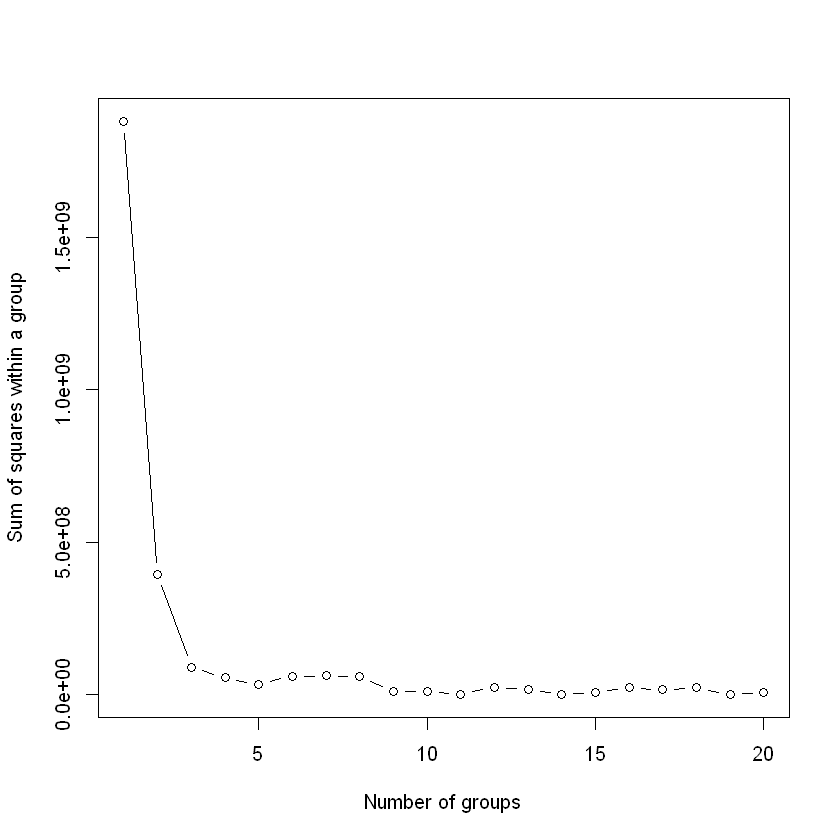

In [136]:
wsplot(input,nc=20)
#nc will check for k here 2  to  20

Here the elbow bend is present at k=3

The k=3 maybe indicating that the moons of the planets may be similar and of 3 kinds

But from the dataset we know that it contains moons of 6 planet, so we are taking k=6 

In [137]:
clustering=kmeans(input,centers=6,nstart=20)

In [138]:
clustering

K-means clustering with 6 clusters of sizes 4, 1, 3, 1, 15, 7

Cluster means:
    distance   diameter     period
1 14125.0000   10.00000 17073.0000
2  3461.0000  200.00000  8626.0000
3  7265.6667   26.66667  6190.3333
4  8053.0000  100.00000 13211.0000
5   351.5600  368.66667   231.0467
6   533.2857 2448.57143   268.4286

Clustering vector:
 [1] 6 5 5 5 6 6 6 6 3 3 3 1 1 1 1 5 5 5 5 5 6 5 5 4 5 5 5 5 5 6 2

Within cluster sum of squares by cluster:
[1] 8737920       0   80970       0 8505205 2596723
 (between_SS / total_SS =  98.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Here we get a good accuraccy of 98.9%

There are 6 clusters of sizes 4,1,3,1,15 and 7